In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import statsmodels.api as sm 
from statsmodels.formula.api import ols, logit, glm

In [3]:
df = pd.read_excel('./df.xlsx')

---

**교차분석(x^2 검정)**
- 독립변인과 종속변인이 모두 명목척도 혹은 서열척도로 측정한 불연속 변인일 때 적용하는 통계방법
- 사례에서 응답자의 '사용브랜드'에 따라 '월수입'에 차이가 있는지, 그리고 '성별'에 따라 '구매장소'에 차이가 있는지를 분석
- 이 경우 독립변인인 '성별'과 '사용브랜드', 그리고 종속적인 '구매장소'는 모두 명목척도로 측정한 불연속 변인이다.
- 관찰빈도 O와 기대빈도 E의 차이를 제곱한 후 기대빈도로 나눈 값을 합산한 값이 **카이제곱값(x^2)**이다.
- <u>카이제곱 값이 유의미한 차이가 있는 것으로 나타나면 독립변인에 따른 종속변인의 빈도분포가 통계적으로 차이가 있다고 간주한다.</u>

In [7]:
pd.crosstab(df['월수입'],df['사용브랜드'])

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [4]:
result = pd.crosstab(df.월수입, df.사용브랜드)

In [5]:
stats.chi2_contingency(observed=result)

(12.86516581745558,
 0.024675611662926037,
 5,
 array([[16.63095238, 16.36904762],
        [18.14285714, 17.85714286],
        [26.20634921, 25.79365079],
        [18.6468254 , 18.3531746 ],
        [20.15873016, 19.84126984],
        [27.21428571, 26.78571429]]))

In [21]:
df['사용브랜드'].value_counts()

1    127
2    125
Name: 사용브랜드, dtype: int64

In [25]:
chisquare(df['월수입'],ddof=[1,2]) 
# 사용브랜드의 값은 1,2 임. ddof(adjustment to the degrees of freedom)에 값을 입력. 이는 사용브랜드에 따라 월수입 차이가 있는가?를 뜻함.

Power_divergenceResult(statistic=196.2733118971061, pvalue=array([0.99491356, 0.99418686]))

카이제곱값이 196.27로 95% 유의수준에서 통계적으로 유의미한 차이가 없는 것으로 해석할 수 있다.

In [12]:
pd.crosstab(df['구매장소'],df['성별'])

성별,0,1
구매장소,,
1,24,19
2,42,29
3,9,13
4,38,52
5,13,13


In [23]:
df['성별'].value_counts()

0    126
1    126
Name: 성별, dtype: int64

In [16]:
chisquare(df['구매장소'],ddof=[0,1]) # 성별의 값은 0,1 임. 이는 성별에 따라 구매장소 차이가 있는가?를 뜻함.

Power_divergenceResult(statistic=148.31174089068827, pvalue=array([0.99999996, 0.99999995]))

카이제곱값이 148.31로 95% 유의수준에서 통계적으로 유의미한 차이가 없는 것으로 해석할 수 있다.

---

**T 검정**
- 독립변인이 불연속변인이고 종속변인이 연속변인일 때 적용하는데, 독립변인의 집단이 2개일 때만 적용한다.
- 사례에서 명목변인인 '사용브랜드'(삼성,애플)에 따라 비율변인인 '구매가격'과 등간변인인 '재구매의향'에 통계적으로 의미있는 차이가 있는가를 분석한다.
- 독립표본 검정을 할 때는 독립변인의 두 집단 사이에 균등하게 분산이 이루어졌는가를 먼저 검정한다.

In [5]:
mean = df['구매가격'].values                       # 평균 비교
mean1 = df[df['사용브랜드']==1].구매가격.values     # 삼성
mean2 = df[df['사용브랜드']==2].구매가격.values     # 애플

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


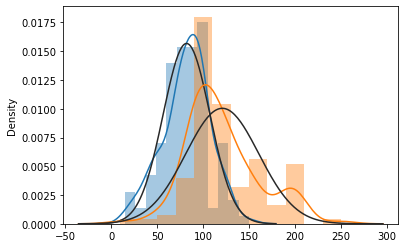

ShapiroResult(statistic=0.9720979928970337, pvalue=0.009973179548978806)

In [6]:
%matplotlib inline

sns.distplot(mean1,kde=True, fit=sp.stats.norm)
sns.distplot(mean2,kde=True, fit=sp.stats.norm)
plt.show()
sp.stats.shapiro(mean1) # H0: Normal Distribution을 따름, Return(W,P-value)


In [7]:
sp.stats.levene(mean1, mean2)   # H0: Normal Distribution을 따름. Return(W,P-value)

LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643848084)

- 레벤 테스트 결과, 사용브랜드 간 등분산성 가정은 위배됨
- p-value가 0.0003 <0.05>> 등분산성 가정 위배
- H0 : mean1, mean2 분산은 같다 (등분산)

In [8]:
# 독립 표본 t검정 (등분산성 위배 조건)
stats.ttest_ind(mean1,mean2,equal_var=False)

Ttest_indResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17)

-  pvalue=3.598124628532717e-17 < 0.05 이므로, 두 집단 간 유의한 차이가 있음

---

**분산분석**

In [10]:
# 연령에 따른 구매가격 차이

anova1 = df[df['연령2']==1].재구매의향.values
anova2 = df[df['연령2']==2].재구매의향.values
anova3 = df[df['연령2']==3].재구매의향.values

# 연령2: 3개의 집단으로 줄임(요인분석한 결과값임)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

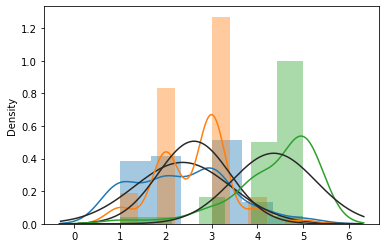

In [16]:
sns.distplot(anova1,kde=False,fit=sp.stats.norm)
sns.distplot(anova2,kde=False,fit=sp.stats.norm)
sns.distplot(anova3,kde=False,fit=sp.stats.norm)
plt.show()

In [15]:
stats.f_oneway(anova1,anova2,anova3)
# 일원분산분석 결과, f 통계량은 0.818이고, pvalue = 0.442450 > 0.05 임.
# 세 집단 간 유의한 차이가 없음

F_onewayResult(statistic=72.42612494637737, pvalue=1.613686022426391e-25)

- pvalue=1.613686022426391e-25 < 0.05
- H0: 연령2의 세 집단간 재구매의향은 차이가 없다.
- 세 집단 간 모두 차이가 없다고 말할 수 없다. --> **사후 테스트 필요**

In [13]:
# 사후 테스트
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df['재구매의향'], # data
groups=df['연령'],  # groups
alpha=0.05) # 유의수준(significance level)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.75,0.0543,-1.5079,0.0079,False
1,3,-0.4026,0.6275,-1.1598,0.3546,False
1,4,-0.3488,0.7869,-1.1507,0.4531,False
1,5,1.4688,0.001,0.6337,2.3038,True
1,6,1.0,0.087,-0.079,2.079,False
2,3,0.3474,0.1719,-0.074,0.7688,False
2,4,0.4012,0.191,-0.0961,0.8985,False
2,5,2.2188,0.001,1.6696,2.7679,True
2,6,1.75,0.001,0.8734,2.6266,True
3,4,0.0538,0.9,-0.4424,0.5499,False


<u>결과 해석</u>
1-3, 2-3 집단간 평균 차이 존재: p-value = 0.001, 귀무가설 기각(reject = True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


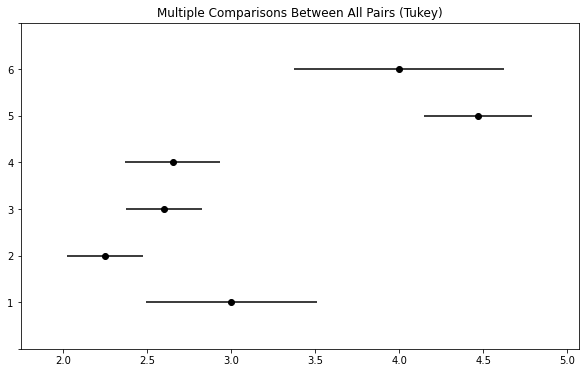

In [14]:
# 그래프로 표시
tukey.plot_simultaneous()
plt.vlines(x=49.58,ymin=-0.5,ymax=4.5,color='red')
plt.show()

---

**상관분석**

In [17]:
sp.stats.pearsonr(df.재구매의향,df.구입조언)

(0.41783620648818565, 4.546075388272401e-12)

거의 상관 없음

In [19]:
corr = sp.stats.pearsonr(df.재구매의향,df.구입조언)
print('상관관계=%.2f,p-value=%.2f'%(corr))

상관관계=0.42,p-value=0.00


In [21]:
df.corr(method='pearson').head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
번호,1.000000,-0.047623,0.055364,-0.025606,-0.086080,-0.051147,-0.050270,0.016985,0.136440,0.078784,...,0.052534,-0.010902,-0.010801,-0.038587,-0.003438,-0.018785,0.014950,-0.201912,-0.155690,0.020283
사용브랜드,-0.047623,1.000000,0.015513,-0.009409,0.504192,-0.056471,-0.022794,-0.023418,-0.086466,-0.048290,...,-0.319646,-0.268644,0.007937,0.035986,0.020569,0.015688,0.078505,0.000946,0.011505,-0.012989
사용기간,0.055364,0.015513,1.000000,-0.033291,0.055694,-0.041385,0.163995,-0.031484,0.364656,0.275456,...,0.049501,-0.070494,0.020953,0.289194,0.280284,0.135625,-0.067558,0.170708,0.200593,-0.031246
구매장소,-0.025606,-0.009409,-0.033291,1.000000,0.000500,0.154155,0.129688,0.096426,-0.112618,-0.101271,...,-0.015530,-0.003555,0.111610,0.063064,0.039499,0.005582,0.052707,-0.052339,-0.025227,-0.125619
구매가격,-0.086080,0.504192,0.055694,0.000500,1.000000,0.036478,0.166607,0.162502,0.016474,0.121168,...,-0.061142,-0.089322,0.054414,0.026217,0.047563,0.102732,-0.021546,0.140954,0.010288,0.031466


In [22]:
ols(formula='재구매의향 ~ 성별+연령+학력+월수입+사용기간+구매가격+구입조언+브랜드이미지+가격만족도+구매중요도1_메모리+하루사용시간', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     51.44
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           7.46e-57
Time:                        11:35:43   Log-Likelihood:                -240.30
No. Observations:                 252   AIC:                             504.6
Df Residuals:                     240   BIC:                             547.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1580      0.226     -0.699      0.485      -0.603       0.287
성별             0.0573      0.085      0.672      0.502      -0.111       0.225
연령             0.0503      0.047      1.071      0.285      -0.042       0.143
학력             0.0062      0.025      0.246      0.806      -0.043       0.056
월수입           -0.0368      0.027     -1.372      0.171      -0.090       0.016
사용기간           0.1292      0.034      3.807      0.000       0.062       0.196
구매가격        3.583e-06      0.001      0.003      0.997      -0.002       0.002
구입조언           0.1206      0.049      2.459      0.015       0.024       0.217
브랜드이미지         0.4527      0.044     10.261      0.000       0.366       0.540
가격만족도          0.3961      0.052      7.626      0.000       0.294       0.498
구매중요도1_메모리    -0.0426      0.028     -1.538      0.125      -0.097       0.012
하루사용시간        -0.0010      0.031     -0.033      0.974      -0.062       0.060
==============================================================================
Omnibus:                        4.865   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.345
Skew:                          -0.249   Prob(JB):                        0.114
Kurtosis:                       2.592   Cond. No.                         611.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R의 형식
- formula = 종속 변수(Depentable variable)
- ~ 뒤의 변수: 독립 변수
- fit(): 최적화

- R-squared: 결정계수

- 회귀식 그리는 방식: P>|t| 값이 0.000인 intercept에 각각의 coef 값을 곱하여 계산. (y = 0.1292 * 사용기간 + 0.1206 * 구입조언 + ...)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44396 missing from current fon

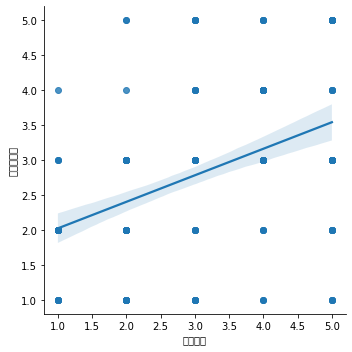

In [24]:
sns.lmplot(y='재구매의향',x='사용기간',data=df)